In [2]:
#********************
# Name: Jonah Zembower
# Project: Harvard Research Study on Postural Stability during Heart Catheterization Surgeries
# Date: January 19, 2025
#********************

# Loading in the Data

#### Importing Libraries:

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Indexes to Remember:

In [5]:
# Set the index for the lead subjects
subject_ids_lead = [
 '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027','2_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031'
]
# Set the index for the rampart subjects
subject_ids_rampart = [
    '6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]

In [6]:
# Index for each CSV file:
index = [
    '1_001','2_001','4_001','6_001', '1_002', '2_002', '3_002', '4_002',
    '1_003','2_003','4_003','1_004','3_004','4_004',
    '1_005','3_005','4_005','5_005','1_006', 
    '2_006', '3_006', '4_006', '1_007', '2_007',
      '3_007', '4_007', '1_008', '2_008', '3_008', '4_008',
      '1_019', '2_019', '3_019', '4_019','1_020','2_020',
       '1_021','2_021','1_022','2_022','3_022','4_022',
        '1_023','2_023','4_023','1_024','2_024','1_026','2_026',
         '1_027','2_027','1_028','2_028','1_029','2_029',
         '1_030','2_030','3_030',  '1_031', '2_031'
]

In [7]:
# The column headers for the CSV files
column_headers = [
    'CERVICAL PS LT [%]', 'CERVICAL PS RT [%]','UPPER TRAP. LT [%]','UPPER TRAP. RT [%]',
    'LUMBAR ES LT [%]','LUMBAR ES RT [%]','MIDDLE TRAP. LT [%]','MIDDLE TRAP. RT [%]'
]

#### Read in the CSVs:

In [3]:
# File paths for all pertinent CSVs
file_paths = {
    "Time_00" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_00.csv",
    "Time_01" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_01.csv",
    "Time_02" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_02.csv",
    "Time_03" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_03.csv",
    "Time_04" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_04.csv",
    "Time_05" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_05.csv",
    "Time_06" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_06.csv",
    "Time_07" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_07.csv",
    "Time_08" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_08.csv",
    "Time_09" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_09.csv",
    "Time_10" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_10.csv",
    "Mean" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Mean.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Peak.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Variability.csv",
}

# Read each CSV into a DataFrame
csv_data = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Analysis Focuses

- The more rightward the curve is shifted the more time you spend at a maximum voluntary contraction/EMG amplitudes. Shifted to the right is more effort spent and shift to the left is less effort spent. 
- Stratify the EMG Stats by rampart versus lead and create tables and graphs for it. 
- Showcase the EMG data for rampart versus lead in averages or one case that showcases major differences. 

Begin by showcasing the averages of the lead and rampart cases at each channel unit interval. Then, make a line plot of lead versus rampart for all subjects on the graph for each muscle joint. 

In [8]:
# Initialize dictionaries to store the averages
lead_averages = {time: {} for time in file_paths.keys()}
rampart_averages = {time: {} for time in file_paths.keys()}

# Remove specific cases from the subject lists
filtered_subject_ids_lead = [subject for subject in subject_ids_lead if subject not in ['2_008', '2_022', '1_004','2_027']]
filtered_subject_ids_rampart = [subject for subject in subject_ids_rampart if subject not in ['2_008', '2_022','1_004','2_027']]

# Calculate the averages for each time interval and each muscle joint
for time, df in csv_data.items():
    for muscle in column_headers:
        lead_averages[time][muscle] = df[df['Unnamed: 0'].isin(filtered_subject_ids_lead)][muscle].mean()
        rampart_averages[time][muscle] = df[df['Unnamed: 0'].isin(filtered_subject_ids_rampart)][muscle].mean()


In [9]:
# Create a dataframe for the averages
lead_averages_df = pd.DataFrame(lead_averages)
rampart_averages_df = pd.DataFrame(rampart_averages)


Now begin to look at the graphs for these averages on a line plot.

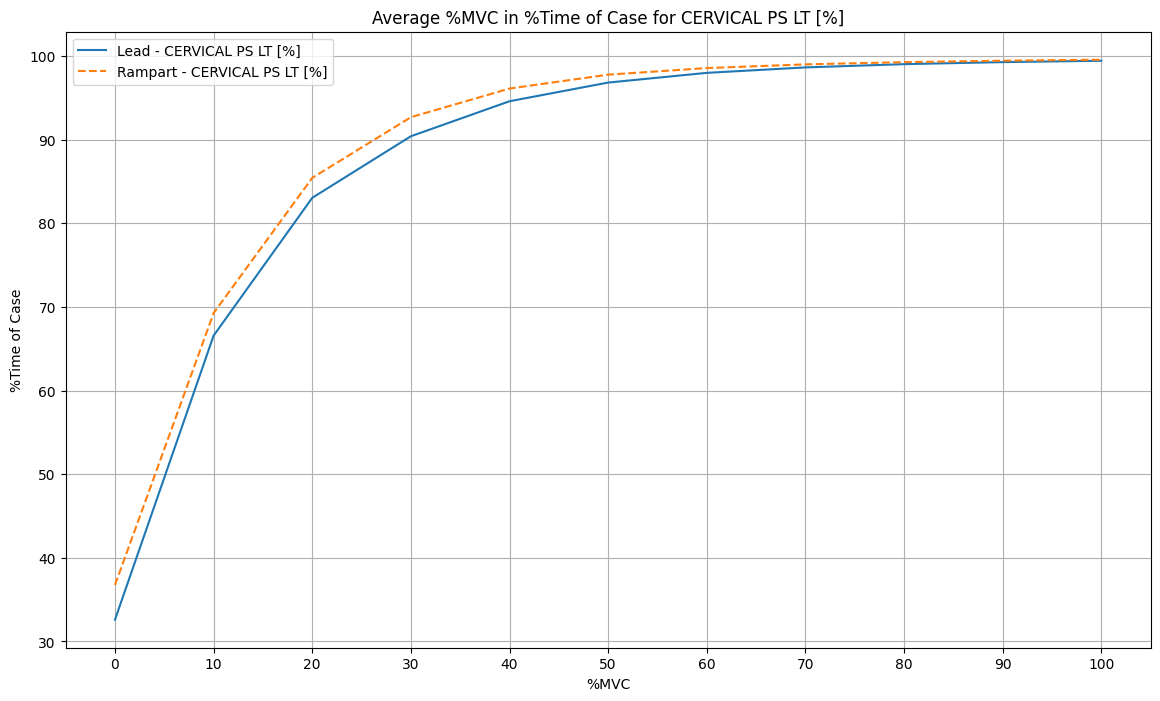

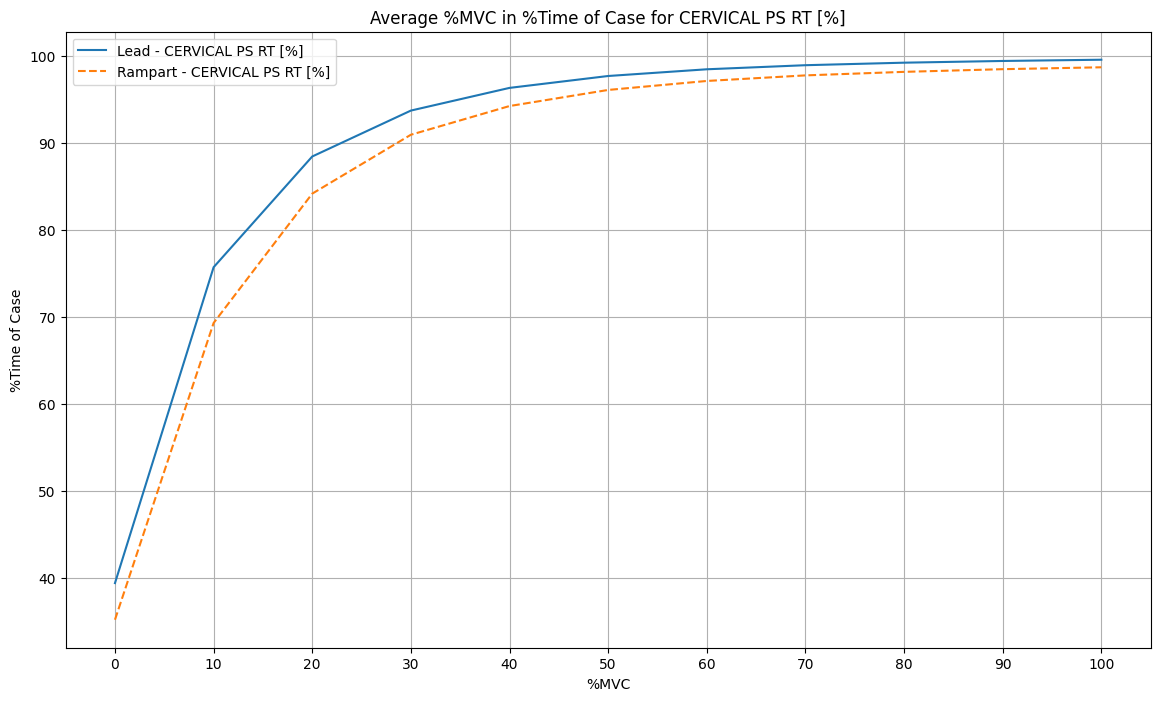

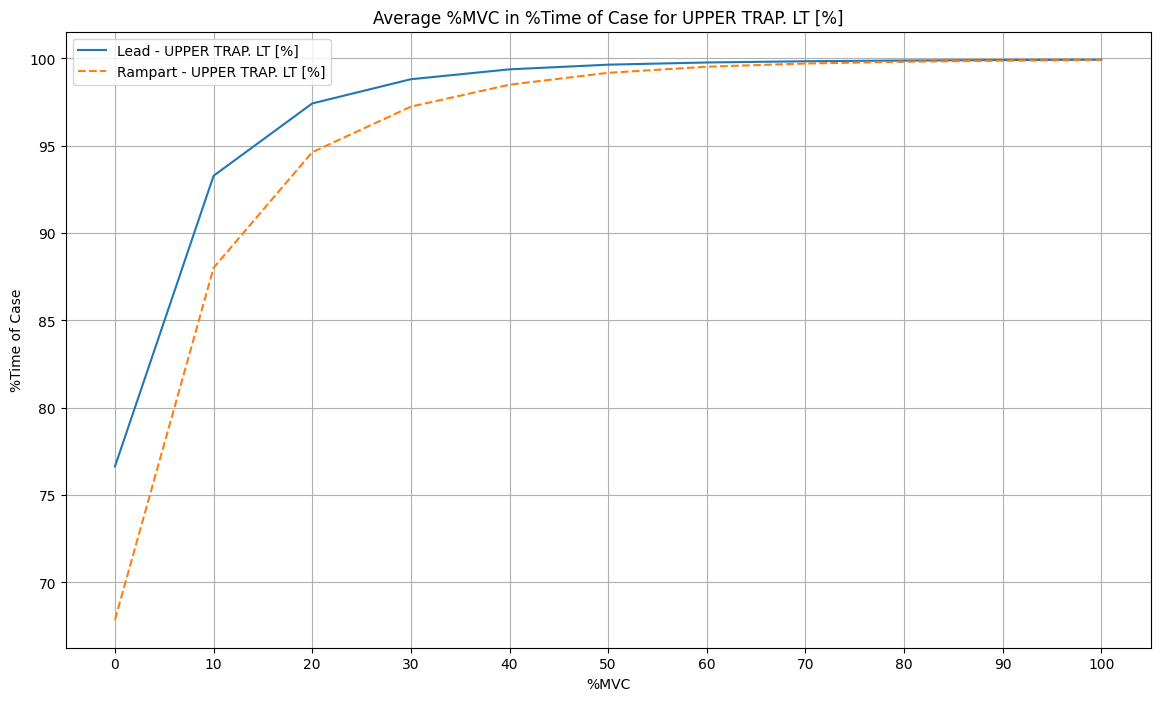

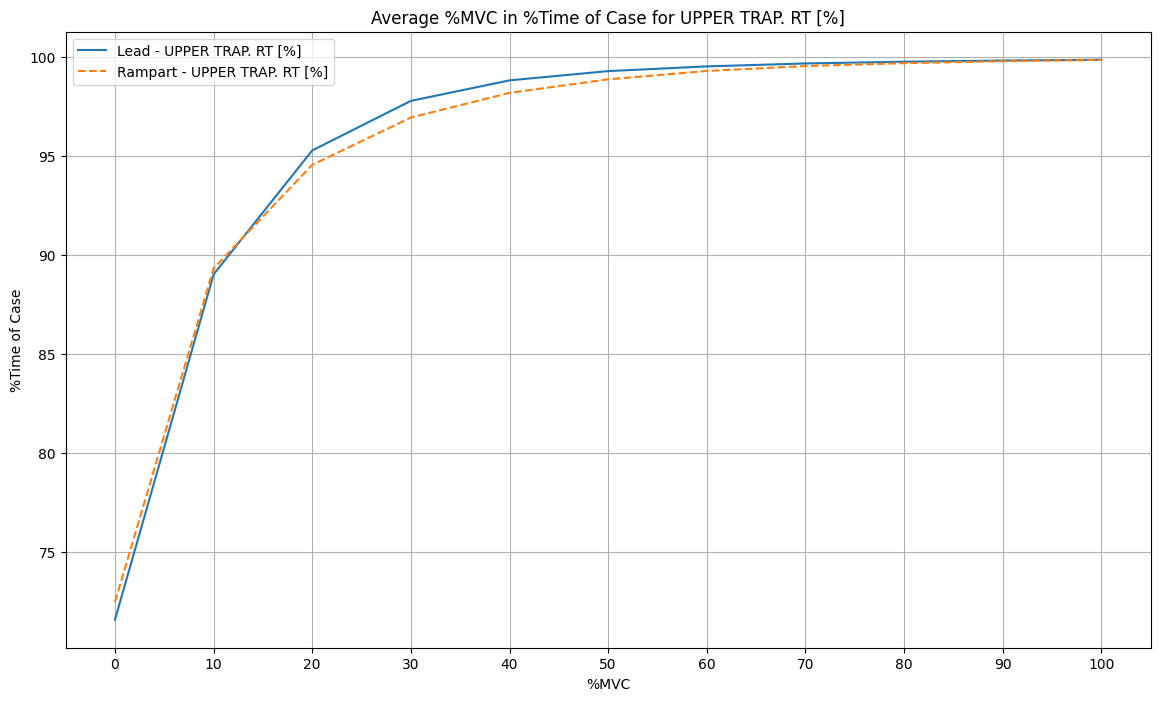

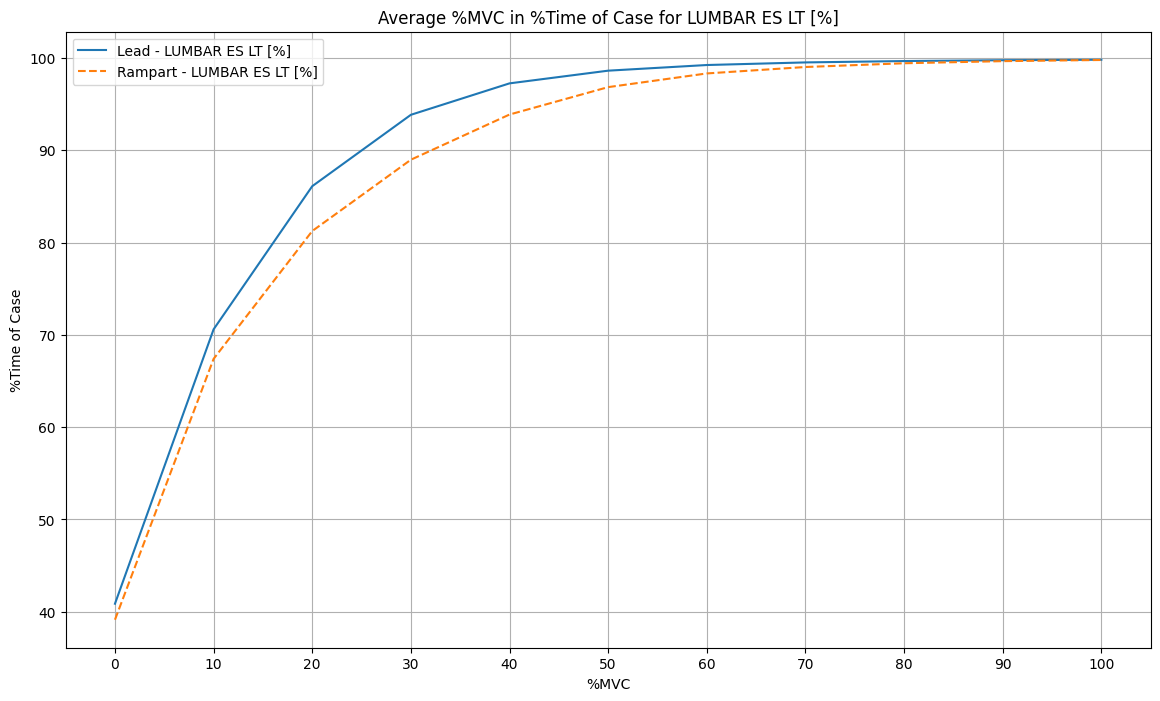

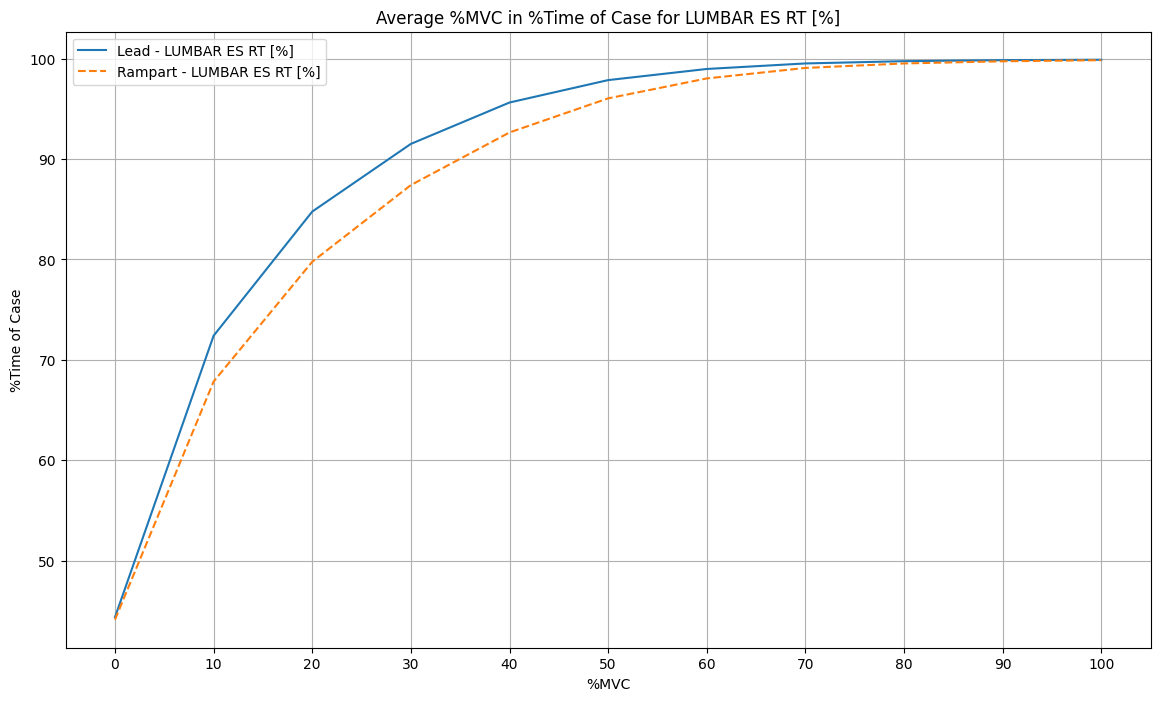

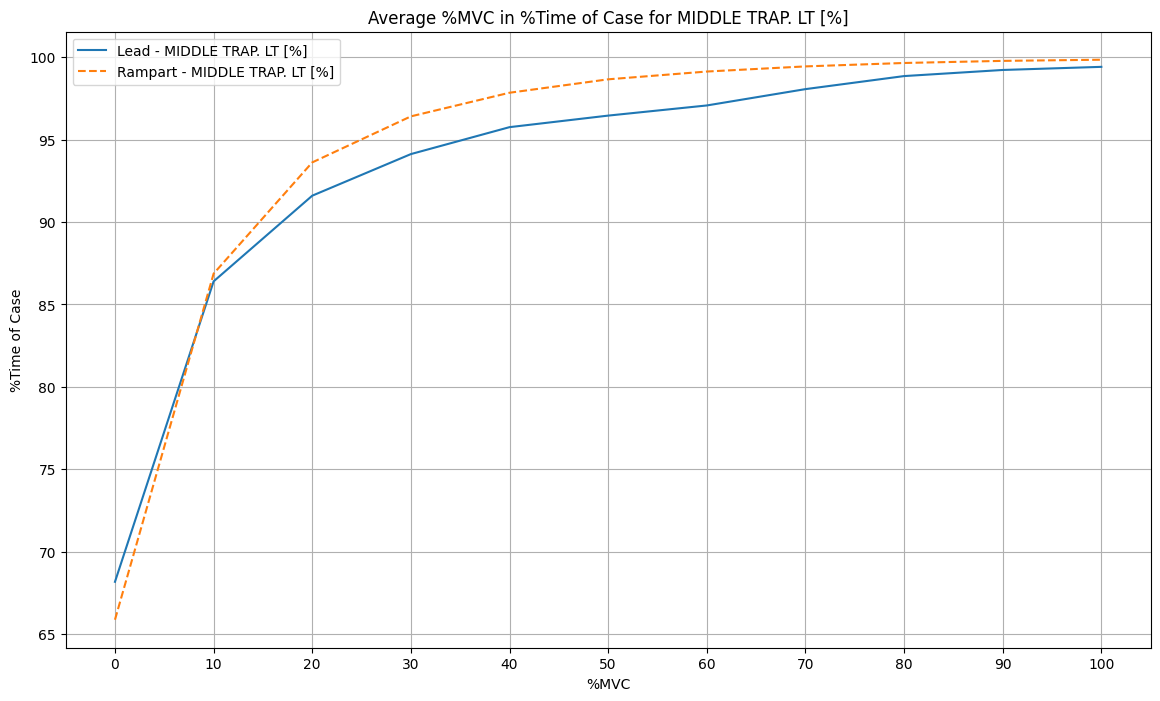

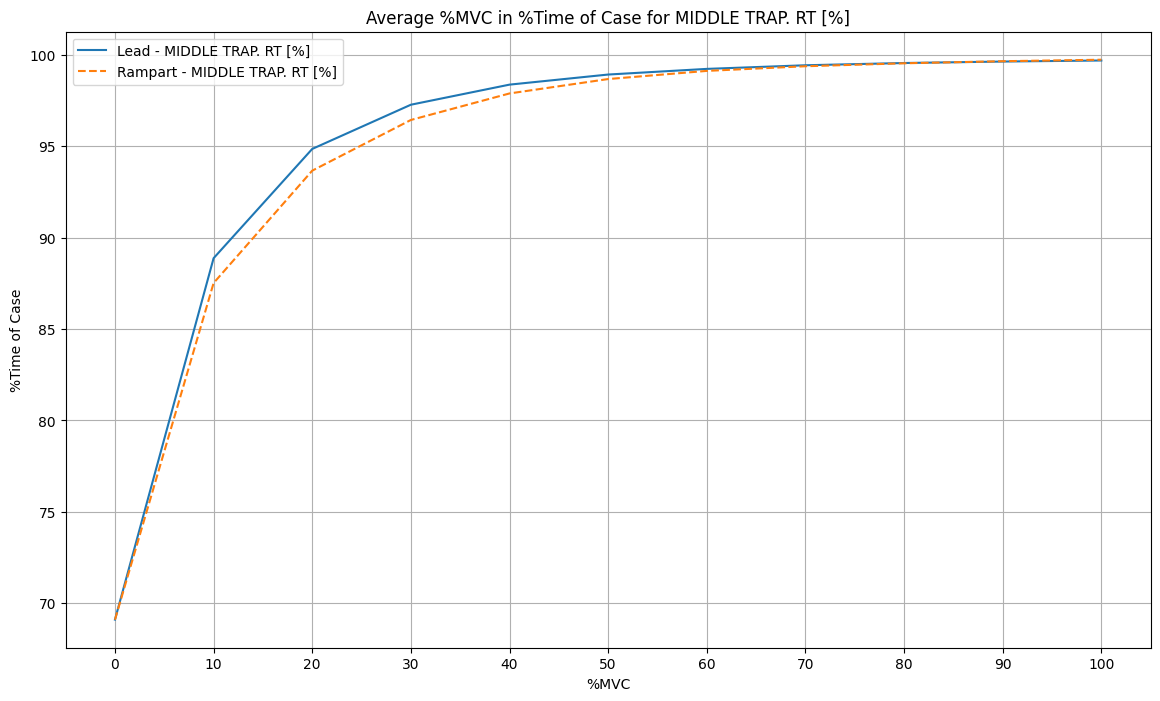

In [11]:
# Plot the averages for each muscle over time in separate graphs
time_labels = [i * 10 for i in range(len(lead_averages_df.columns[:-3]))]

for muscle in column_headers:
    plt.figure(figsize=(14, 8))
    plt.plot(time_labels, lead_averages_df.loc[muscle].iloc[:-3], label=f'Lead - {muscle}')
    plt.plot(time_labels, rampart_averages_df.loc[muscle].iloc[:-3], label=f'Rampart - {muscle}', linestyle='--')
    
    plt.xlabel('%MVC')
    plt.ylabel('%Time of Case')
    plt.title(f'Average %MVC in %Time of Case for {muscle}')
    plt.xticks(time_labels)
    plt.legend()
    plt.grid(True)
    plt.show()


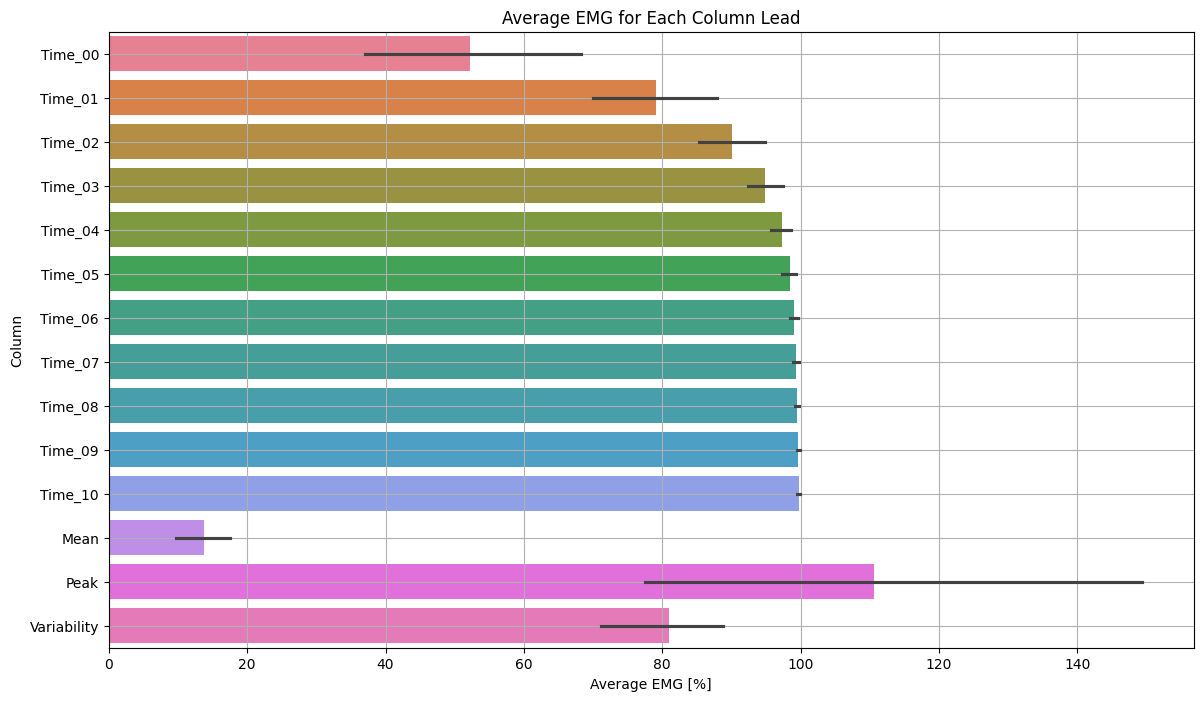

In [25]:
# Create a barplot of the EMG mean for each column
plt.figure(figsize=(14, 8))
sns.barplot(data=lead_averages_df.iloc[:-3], orient='h')
plt.xlabel('Average EMG [%]')
plt.ylabel('Column')
plt.title('Average EMG for Each Column Lead')
plt.grid(True)
plt.show()

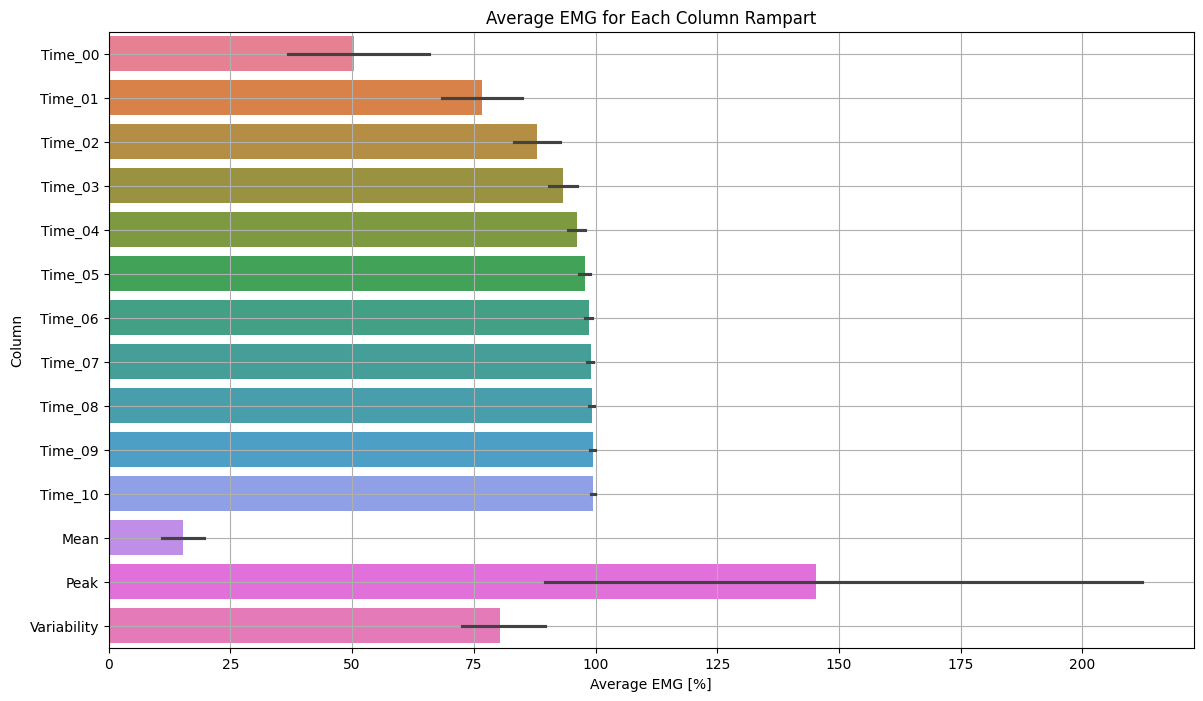

In [26]:
# Create a barplot of the EMG mean for each column
plt.figure(figsize=(14, 8))
sns.barplot(data=rampart_averages_df.iloc[:-3], orient='h')
plt.xlabel('Average EMG [%]')
plt.ylabel('Column')
plt.title('Average EMG for Each Column Rampart')
plt.grid(True)
plt.show()

#### Showcase the EMG Stats Stratified:

Subject 2_008 and 2_022 and 1_004 and 2_027 were not accurate. So, I removed those subject cases.

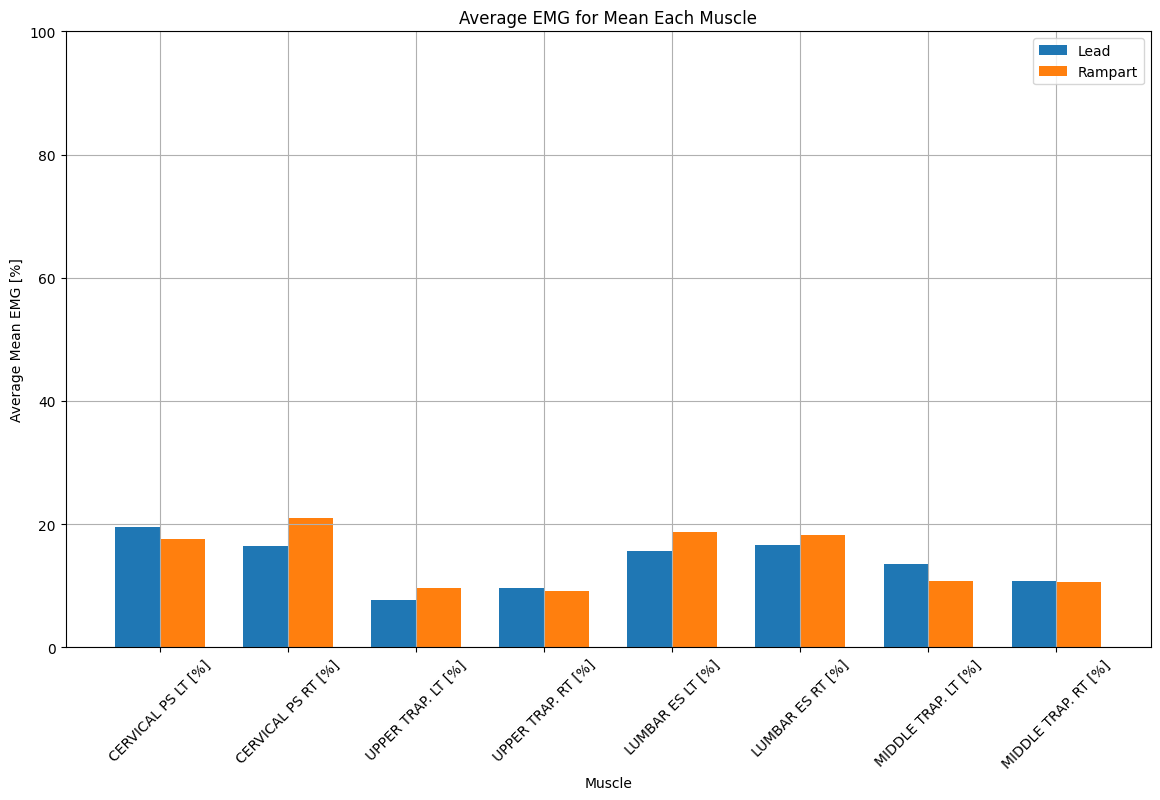

In [27]:
# Create a barplot of the EMG mean for each column
Mean_lead = lead_averages_df['Mean']
Mean_rampart = rampart_averages_df['Mean']

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(Mean_lead))

plt.figure(figsize=(14, 8))
plt.bar(index, Mean_lead, bar_width, label='Lead')
plt.bar(index + bar_width, Mean_rampart, bar_width, label='Rampart')

plt.xlabel('Muscle')
plt.ylabel('Average Mean EMG [%]')
plt.title('Average EMG for Mean Each Muscle')
plt.xticks(index + bar_width / 2, Mean_lead.index, rotation=45)
plt.legend()
plt.grid(True)
plt.ylim(0, 100)
plt.show()


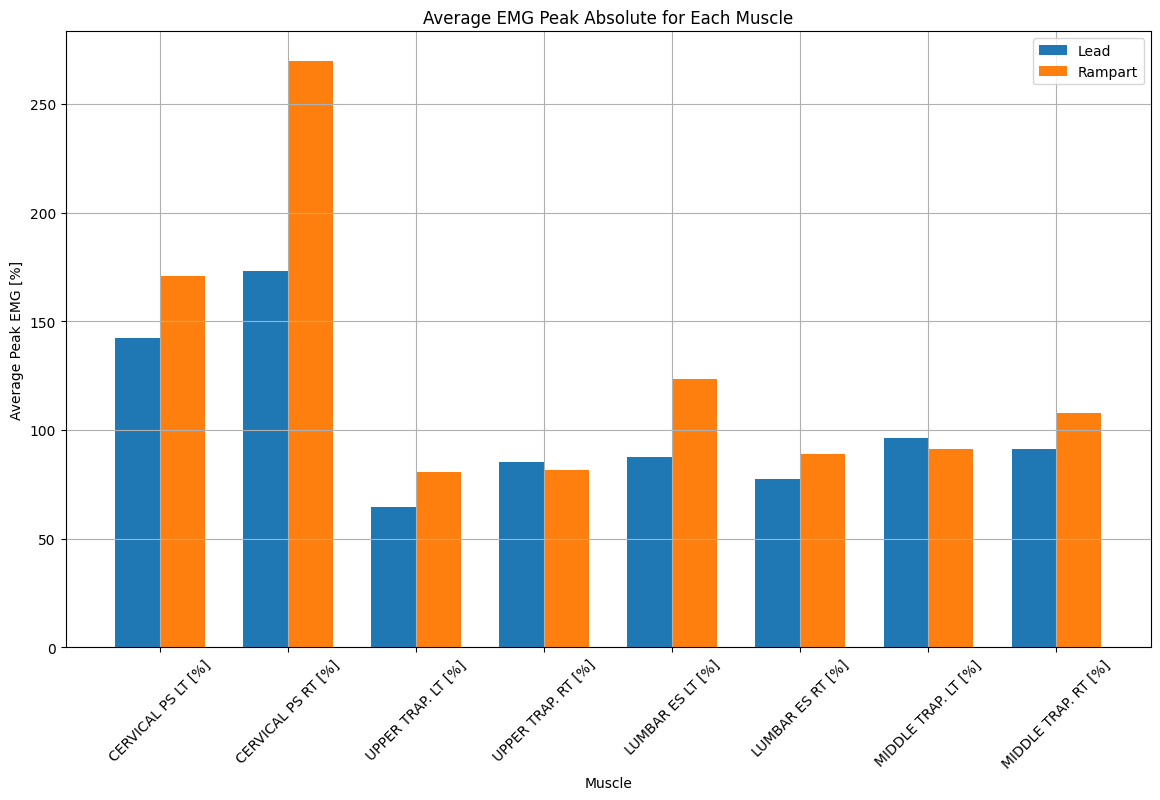

In [28]:
# Create a barplot of the EMG mean for each column
Peak_lead = lead_averages_df['Peak']
Peak_rampart = rampart_averages_df['Peak']

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(Peak_lead))

plt.figure(figsize=(14, 8))
plt.bar(index, Peak_lead, bar_width, label='Lead')
plt.bar(index + bar_width, Peak_rampart, bar_width, label='Rampart')

plt.xlabel('Muscle')
plt.ylabel('Average Peak EMG [%]')
plt.title('Average EMG Peak Absolute for Each Muscle')
plt.xticks(index + bar_width / 2, Peak_lead.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

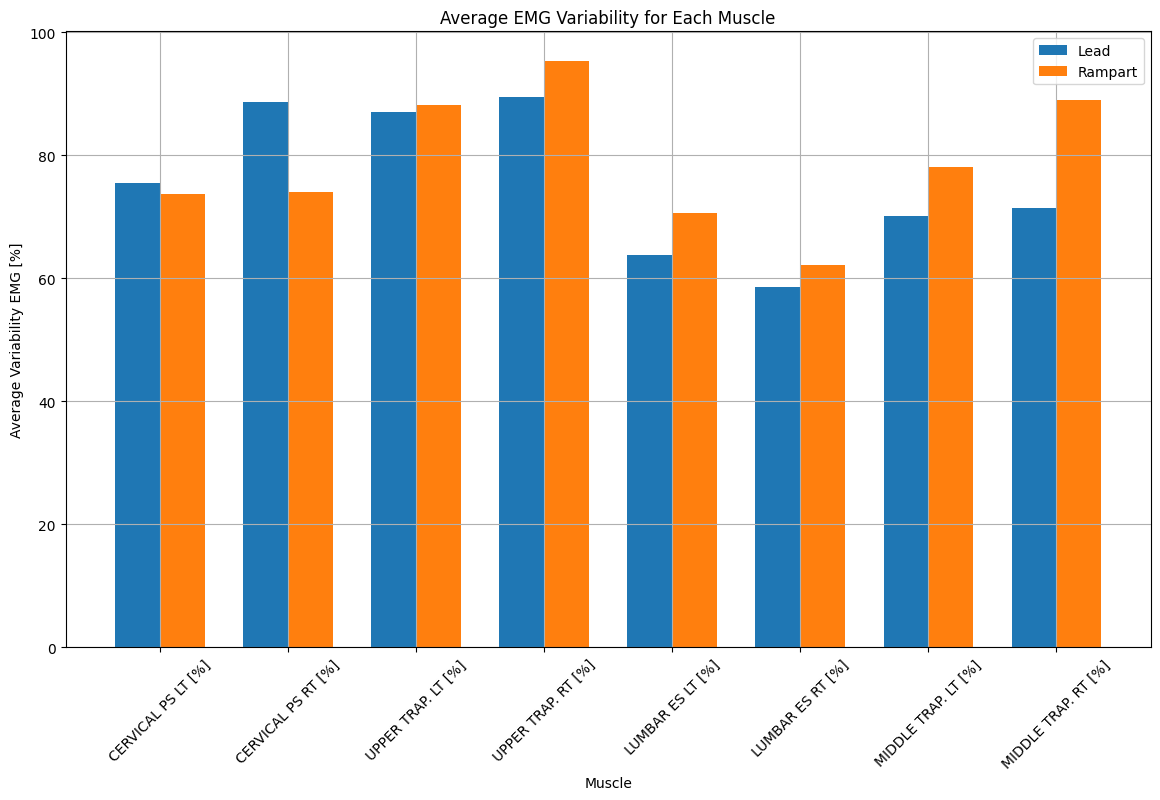

In [29]:
# Create a barplot of the EMG mean for each column
Variability_lead = lead_averages_df['Variability']
Variability_rampart = rampart_averages_df['Variability']

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(Peak_lead))

plt.figure(figsize=(14, 8))
plt.bar(index, Variability_lead, bar_width, label='Lead')
plt.bar(index + bar_width, Variability_rampart, bar_width, label='Rampart')

plt.xlabel('Muscle')
plt.ylabel('Average Variability EMG [%]')
plt.title('Average EMG Variability for Each Muscle')
plt.xticks(index + bar_width / 2, Variability_lead.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()